In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
from utils.connect  import connect
o = connect()

# pagerank & hits

In [3]:
data = pd.read_table("./result/pagerank.txt")
hist_a = pd.read_table("./result/hits_a.txt")
hist_h = pd.read_table("./result/hits_h.txt")
data['h'] = hist_h['h']
data['a'] = hist_a['a']
data

,id,pagerank,h,a
0,50567111,1.714631e-06,4.376455e-06,1.175334e-06
1,8517910,1.999484e-06,0.000000e+00,7.507156e-08
2,61306948,7.992035e-08,4.133725e-09,0.000000e+00
3,60854565,7.992035e-08,4.688124e-10,0.000000e+00
4,57724193,7.992035e-08,4.808973e-11,0.000000e+00
...,...,...,...,...
3801770,90369758,7.992035e-08,1.935796e-11,0.000000e+00
3801771,72910664,7.992035e-08,1.935796e-11,0.000000e+00
3801772,72599709,7.992035e-08,1.935796e-11,0.000000e+00
3801773,34569793,7.992035e-08,1.935796e-11,0.000000e+00


In [4]:
data.iloc[:,1:].describe()

,pagerank,h,a
count,3.801775e+06,3.801775e+06,3.801775e+06
mean,2.630350e-07,2.630350e-07,2.630350e-07
std,1.035325e-05,9.151808e-07,3.098953e-06
min,7.992035e-08,-7.552653e-25,-1.900506e-22
25%,7.992035e-08,1.368570e-10,0.000000e+00
50%,7.992035e-08,8.886910e-09,0.000000e+00
75%,8.279140e-08,1.038977e-07,4.657859e-08
max,1.251692e-02,2.618888e-04,2.847239e-03


In [5]:
delta = 1

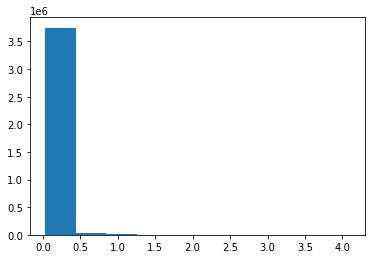

In [6]:
plt.hist(np.log10(data['pagerank']*1e6+delta))
plt.show()

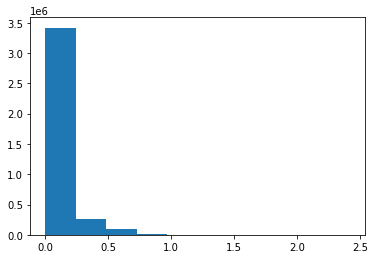

In [7]:
plt.hist(np.log10(data['h']*1e6+delta))
plt.show()

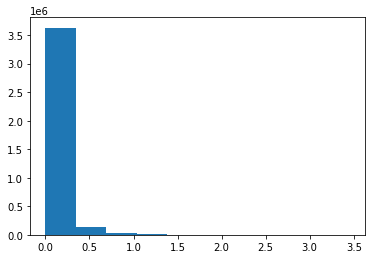

In [8]:
plt.hist(np.log10(data['a']*1e6+delta))
plt.show()

In [9]:
def mainpage(id):
    sql = "select login from ods_github_users where database_id = %s" % id
    with o.execute_sql(sql).open_reader() as reader:
        for record in reader:
            return "https://github.com/" + record.login

In [10]:
data.sort_values(by = 'pagerank').tail(5)

,id,pagerank,h,a
19052,810438,0.004137,4.104238e-06,0.001466
1807,499550,0.005089,8.645806e-06,0.001641
2613,905434,0.005173,0.000000e+00,0.001180
8096,66577,0.005820,3.916010e-07,0.000728
6200,1024025,0.012517,0.000000e+00,0.002847


In [11]:
for user_id in data.sort_values(by = 'pagerank', ascending=False).head(5)['id']:
    print(user_id, end=" ")
    print(mainpage(user_id))

1024025 https://github.com/torvalds
66577 https://github.com/JakeWharton
905434 https://github.com/ruanyf
499550 https://github.com/yyx990803
810438 https://github.com/gaearon


In [12]:
for user_id in data.sort_values(by = 'h', ascending=False).head(5)['id']:
    print(user_id, end=" ")
    print(mainpage(user_id))

14808551 https://github.com/Lisprez
250445 https://github.com/batermj
4624113 https://github.com/Magicianred
14338588 https://github.com/AlexxNica
18233711 https://github.com/justStarNew


In [13]:
for user_id in data.sort_values(by = 'a', ascending=False).head(5)['id']:
    print(user_id, end=" ")
    print(mainpage(user_id))

1024025 https://github.com/torvalds
499550 https://github.com/yyx990803
810438 https://github.com/gaearon
905434 https://github.com/ruanyf
170270 https://github.com/sindresorhus


# BurstBiRank

In [14]:
actor = pd.read_table("./result/burstbirank_actor.txt")

In [15]:
actor.count()

actor_id    134279
rank        134279
dtype: int64

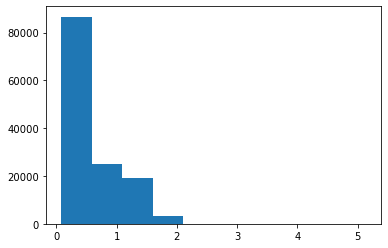

In [16]:
delta = 1.0
plt.hist(np.log10(actor['rank']*1e6+delta))
plt.show()

In [17]:
repo = pd.read_table("./result/burstbirank_repo.txt")

In [18]:
repo.count()

repo_id    41667
rank       41667
dtype: int64

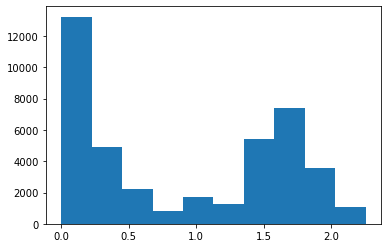

In [19]:
delta = 1.0
plt.hist(np.log10(repo['rank']*1e6+delta))
plt.show()

In [1]:
id2name = {}
with open("./data/users_name.csv", "r") as f:
    for line in f:
        try:
            temp = line.split(',')
            temp_id = int(temp[0])
            temp_name = temp[1][:-1]
            id2name[temp_id] = temp_name
        except ValueError:
            continue

FileNotFoundError: [Errno 2] No such file or directory: './data/users_name.csv'

In [21]:
actor = actor.sort_values(by = 'rank', ascending=False)
actor

,actor_id,rank
99766,49699333,1.356540e-01
78947,27856297,2.970224e-02
92040,41898282,1.465271e-02
80041,29139614,9.897163e-03
69581,19733683,7.030640e-03
...,...,...
40302,5627428,2.095829e-07
96163,45841273,2.095829e-07
29834,2762623,2.095829e-07
7978,298435,2.095829e-07


In [22]:
for actor_id in actor.head(10)['actor_id']:
    print(actor_id, end=" ")
    print(id2name[actor_id])

49699333 dependabot[bot]
27856297 dependabot-preview[bot]
41898282 github-actions[bot]
29139614 renovate[bot]
19733683 snyk-bot
39814207 pull[bot]
37929162 mergify[bot]
26384082 stale[bot]
31301654 imgbot[bot]
46447321 allcontributors[bot]


In [23]:
bot_cnt = 0
for actor_id in actor.head(50)['actor_id']:
    if 'bot' in id2name[actor_id]:
        bot_cnt += 1
print(bot_cnt/50)

0.44


In [24]:
bot_cnt = 0
for actor_id in actor.head(100)['actor_id']:
    if 'bot' in id2name[actor_id]:
        bot_cnt += 1
print(bot_cnt/100)

0.28


In [25]:
i = 0
for actor_id in actor.head(50)['actor_id']:
    name = id2name[actor_id]
    if "bot" not in name:
        print(actor_id, end=" ")
        print("https://github.com/" + id2name[actor_id])
        i += 1
    if i == 5:
        break

31519754 https://github.com/bohdanklius
43047562 https://github.com/scala-steward
22633385 https://github.com/eltociear
81964055 https://github.com/w0wn3r0
81969455 https://github.com/abelschroder


# BurstBiRank no bot

In [26]:
actor_nobot = pd.read_table("./result/burstbirank_nobot_actor.txt")

In [27]:
actor_nobot.count()

actor_id    133431
rank        133431
dtype: int64

In [28]:
actor_nobot= actor_nobot.sort_values(by = 'rank', ascending=False)
actor_nobot

,actor_id,rank
99065,49307266,1.698802e-02
79340,28701943,1.697430e-02
99821,50273712,1.671893e-02
109843,61370901,1.663876e-02
114618,66905013,1.656699e-02
...,...,...
112227,63962870,1.347985e-08
112226,63961273,1.347985e-08
112225,63954316,1.347985e-08
55370,11039634,1.347985e-08


In [29]:
for actor_id in actor_nobot.head(5)['actor_id']:
    print(actor_id , "https://github.com/" + id2name[actor_id])

49307266 https://github.com/wannte
28701943 https://github.com/YounghoonKwon
50273712 https://github.com/TaewanKimmmm
61370901 https://github.com/PapimonLikelion
66905013 https://github.com/knae11


# compare

In [30]:
scipy.stats.pearsonr(data['pagerank'], data['a'])

(0.7965697078035007, 0.0)

In [31]:
alldata = pd.merge(data, actor_nobot,how='inner',left_on='id', right_on = 'actor_id')

In [32]:
print(len(data))
print(len(actor_nobot))
print(len(alldata))

3801775
133431
105158


In [33]:
scipy.stats.pearsonr(alldata['pagerank'], alldata['a'])

(0.7682528981064298, 0.0)

In [34]:
scipy.stats.pearsonr(alldata['pagerank'], alldata['rank'])

(-0.0016157752730159868, 0.600307113329816)

In [35]:
scipy.stats.pearsonr(alldata['a'], alldata['rank'])

(-0.004377401213684017, 0.15575421675986548)

因为PageRank与HITS效果相近，所以仅采用PageRank的结果与BurstBiRank的结果相比较

In [36]:
pagerank = data.iloc[:,0:2]
pagerank = pagerank.sort_values(by = 'pagerank', ascending=False)
pagerank['ranking'] = pagerank['pagerank'].rank(method='first',ascending=False)
pagerank

,id,pagerank,ranking
6200,1024025,1.251692e-02,1.0
8096,66577,5.819836e-03,2.0
2613,905434,5.172741e-03,3.0
1807,499550,5.088732e-03,4.0
19052,810438,4.136521e-03,5.0
...,...,...,...
1875066,39608063,7.992035e-08,3801771.0
1875067,15761235,7.992035e-08,3801772.0
1875068,18345327,7.992035e-08,3801773.0
1875069,15229541,7.992035e-08,3801774.0


In [37]:
actor_nobot['ranking'] = actor_nobot['rank'].rank(method='first',ascending=False)
actor_nobot

,actor_id,rank,ranking
99065,49307266,1.698802e-02,1.0
79340,28701943,1.697430e-02,2.0
99821,50273712,1.671893e-02,3.0
109843,61370901,1.663876e-02,4.0
114618,66905013,1.656699e-02,5.0
...,...,...,...
112227,63962870,1.347985e-08,133427.0
112226,63961273,1.347985e-08,133428.0
112225,63954316,1.347985e-08,133429.0
55370,11039634,1.347985e-08,133430.0


In [38]:
for actor_id in actor_nobot.head(5)['actor_id']:
    r = int(pagerank[pagerank['id']==actor_id]['ranking'])
    print(actor_id, int(r), "%.6f%%" %(int(r)/len(pagerank)*100))

49307266 147173 3.871165%
28701943 56295 1.480756%
50273712 50531 1.329142%
61370901 144613 3.803828%
66905013 107438 2.825996%


In [39]:
for actor_id in pagerank.head(5)['id']:
    r = actor_nobot[actor_nobot['actor_id']==actor_id]['ranking']
    try:
        print(actor_id, int(r), "%.6f%%" %(int(r)/len(actor_nobot)*100))
    except TypeError:
        print(actor_id, -1, -1)

1024025 -1 -1
66577 21960 16.457945%
905434 -1 -1
499550 9810 7.352115%
810438 23141 17.343046%


# cheat

In [40]:
rank_percent_p = [int(i / 100 * len(pagerank)) for i in [20, 40, 60, 80]]
p = pagerank[pagerank['ranking'].isin(rank_percent_p)]
p

,id,pagerank,ranking
1735580,87947603,8.580403e-08,760355.0
1854157,65024265,7.997761e-08,1520710.0
3037907,93661980,7.992035e-08,2281065.0
864241,21011899,7.992035e-08,3041420.0


In [41]:
cheat_pagerank = pd.read_table("./result_cheat/pagerank.txt")

In [42]:
cheat_pagerank['ranking'] = cheat_pagerank['pagerank'].rank(method='first',ascending=False)

In [43]:
for i in p['id']:
    print(i, "%.6f%%" %(cheat_pagerank[cheat_pagerank['id']==i]['ranking']/len(cheat_pagerank) * 100))

87947603 19.926824%
65024265 34.210994%
93661980 39.993871%
21011899 56.809727%


In [44]:
rank_percent_b = [int(i / 100 * len(actor_nobot)) for i in [20, 40, 60, 80]]
b = actor_nobot[actor_nobot['ranking'].isin(rank_percent_b)]
b

,actor_id,rank,ranking
37710,4995967,2.690126e-08,26686.0
82441,31698676,1.967461e-08,53372.0
111621,63229723,1.697664e-08,80058.0
105464,56715417,1.551611e-08,106744.0


In [45]:
cheat_burstbirank = pd.read_table("./result_cheat/burstbirank_nobot_actor.txt")

In [46]:
cheat_burstbirank['ranking'] = cheat_burstbirank['rank'].rank(method='first',ascending=False)

In [47]:
for i in b['actor_id']:
    print(i, "%.6f%%" %(cheat_burstbirank[cheat_burstbirank['actor_id']==i]['ranking']/len(cheat_burstbirank) * 100))

4995967 19.999850%
31698676 39.999700%
63229723 59.999550%
56715417 79.999400%
